---
<h1 align='center'><strong>4️⃣"Fake News" Classifier</strong></h1>

---


In [1]:
!git clone https://github.com/mohd-faizy/Natural_Language_Processing_in_Python.git

Cloning into 'Natural_Language_Processing_in_Python'...
remote: Enumerating objects: 170, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 170 (delta 29), reused 39 (delta 16), pack-reused 116
Receiving objects: 100% (170/170), 33.13 MiB | 37.08 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# plt.style.use('fivethirtyeight')
# plt.style.use('ggplot')
# sns.set_theme()

%matplotlib inline

In [3]:
from pprint import pprint

In [4]:
import nltk

# Download a specific NLTK dataset, e.g., the 'punkt' tokenizer models.
nltk.download('punkt', quiet=True)

# Download the NLTK stopwords dataset, which contains common stopwords for various languages.
nltk.download('stopwords', quiet=True)

# Download the WordNet lexical database, which is used for various NLP tasks like synonym and antonym lookup.
nltk.download('wordnet', quiet=True)

# Download the NLTK averaged perceptron tagger, which is used for part-of-speech tagging.
nltk.download('averaged_perceptron_tagger', quiet=True)

# Download the NLTK names dataset, which contains a list of common first names and last names.
# nltk.download('names', quit=True)

# Download the NLTK movie_reviews dataset, which contains movie reviews categorized as positive and negative.
# nltk.download('movie_reviews', quit=True)

# Download the NLTK reuters dataset, which is a collection of news documents categorized into topics.
# nltk.download('reuters', quit=True)

# Download the NLTK brown corpus, which is a collection of text from various genres of written American English.
# nltk.download('brown', quit=True)

# Download the 'maxent_ne_chunker' dataset, which is used for Named Entity Recognition.
nltk.download('maxent_ne_chunker', quiet=True)

# Download the 'words' dataset, which contains a list of common English words.
nltk.download('words', quiet=True)

True

In [5]:
os.chdir('/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets


In [6]:
ls

 articles.csv            grail.txt            wikipedia_articles/
 english_stopwords.txt   news_articles/      'Wikipedia articles.zip'
 fake_or_real_news.csv  'News articles.zip'


## **Supervised Learning and NLP for Fake News Classification**

### Introduction

- Utilizing supervised learning with NLP for fake news classification.
- Focus on linguistic features over geometric ones, using `Bag-of-Words` or `TF-IDF` models.

### **Supervised Learning Steps**

1. **Data Preparation**:
   - Gather and preprocess news article data.
   - Ensure data quality and consistency.

2. **Label Assignment**:
   - Categorize articles as "`fake`" or "`authentic`" based on analysis and expertise.

3. **Data Splitting**:
   - Divide the dataset into `training` and `test` sets.

4. **Feature Extraction**:
   - Convert text into numerical representations (`BoW` or `TF-IDF`) to aid in prediction.

5. **Model Evaluation**:
   - Assess model performance using metrics like `accuracy`, `precision`, `recall`, and `F1-score`.

By following these steps, we can effectively classify fake news, contributing to misinformation mitigation.


## **Building word count vectors with scikit-learn**


In [7]:
url = "/content/Natural_Language_Processing_in_Python/01-NLP-basics/_datasets/fake_or_real_news.csv"
df = pd.read_csv(url)
print(df.shape)
df.head()

(6335, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [8]:
# Import necessary libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Prepare the data for text classification
X = df['text']
y = df.label

# Split the data into training and testing sets
# - test_size is set to 0.33, meaning 33% of the data will be used for testing
# - random_state is set to 53 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33,
                                                    random_state=53)

# Create an instance of the CountVectorizer with specified settings
# - 'stop_words' is set to 'english' to remove common English stopwords (e.g., "the", "and")
count_vectorizer = CountVectorizer(stop_words='english')

# Use the CountVectorizer to transform the training data (X_train)
# This converts the text data into a 'bag-of-words' representation
count_train = count_vectorizer.fit_transform(X_train)

# Use the same CountVectorizer to transform the test data (X_test)
# Note that we use 'transform' on the test data to ensure consistent vocabulary
count_test = count_vectorizer.transform(X_test)

# Print the first 10 feature names (words) in the bag-of-words representation
print(count_vectorizer.get_feature_names_out()[:10])

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']


>The reason we use `fit_transform` on `X_train` and transform on `X_test` is to avoid data leakage. Data leakage occurs when information from the test set is used to train the model, which can lead to overfitting and unrealistic performance estimates. To prevent this, we need to ensure that the model only learns from the training set and does not see the test set until the evaluation stage.

- **The `fit_transform` method does two things:** it fits the `CountVectorizer` to the training data, which means it **learns the vocabulary** and **the frequency of each word** in the training data, and it transforms the training data into a sparse matrix of word counts.

- **The `transform` method only does the second thing:** it transforms the test data into a sparse matrix of word counts using the vocabulary and frequency learned from the training data. This way, the test data is not used to influence the model training, and we can get a fair evaluation of the model’s performance on unseen data.

### **TfidfVectorizer for text classification**

Similar to the sparse `CountVectorizer` created in the previous exercise, you'll work on creating tf-idf vectors for your documents. You'll set up a `TfidfVectorizer` and investigate some of its features.

In [9]:
# Import the TfidfVectorizer class from the scikit-learn library
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer with specified settings
# - 'stop_words' is set to 'english' to remove common English stopwords (e.g., "the", "and")
# - 'max_df' is set to 0.7 to ignore terms that have a document frequency higher than 70%
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Use the TfidfVectorizer to transform the training data (X_train)
# This converts the text data into a TF-IDF matrix
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Use the same TfidfVectorizer to transform the test data (X_test)
# Note that we use 'transform' on the test data to ensure consistent vocabulary and scaling
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 feature names (terms) in the TF-IDF matrix
print(tfidf_vectorizer.get_feature_names_out()[:10])

# Print the TF-IDF values of the first 5 training examples as a dense array
display(tfidf_train.A[:5])

['00' '000' '0000' '00000031' '000035' '00006' '0001' '0001pt' '000ft'
 '000km']


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### `CountVectorizer` vs `TfidfVectorizer`

- `CountVectorizer` simply counts the occurrences of words.
- `TfidfVectorizer` considers both the frequency of a word in a document and its rarity across the entire corpus, giving more weight to words that are important within a document but less common in the corpus. This makes it a better choice when you want to capture the relative importance of words in text data.

- **`count_train.A`** represents the output of the `CountVectorizer` for the training data. The `.A` attribute is used to convert the **`Sparse Matrix`** generated by the **CountVectorizer** into a **`Dense Matrix`**. **This dense matrix contains the counts of each term (word) in each document in your training dataset.**

- **`tfidf_train.A`**  is used to access the **Dense Matrix** representation of the `TF-IDF` (Term Frequency-Inverse Document Frequency) matrices for the training and test data.

### **Inspecting the vectors**

To get a better idea of how the `vectors` work, we will investigate them by converting them into **pandas DataFrames**.

- Create DataFrames `count_df` and `tfidf_df` using `pd.DataFrame()`.
- Specify values as the first argument and columns (features) as the second argument.
- Access values using the `.A` attribute of `count_train` and `tfidf_train`.
- Access columns using the `.get_feature_names_out()` methods of `count_vectorizer` and `tfidf_vectorizer`.
- Print the head of each DataFrame to inspect their structure.
- Test if column names are the same by creating an object called `difference`.
- Find the difference between columns in `count_df` and `tfidf_df` using `.columns`.
- Check if the two DataFrames are equivalent using the `.equals()` method with `count_df` and `tfidf_df` as arguments.


In [10]:
print(count_train.A)
print(tfidf_train.A)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names_out())

# Print the head of count_df
print(count_df.head())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names_out())

# Print the head of tfidf_df
print(tfidf_df.head())


# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

# Check whether the DataFrame are equal
print(count_df.equals(tfidf_df))

   00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0   0    0     0         0       0      0     0       0      0      0  ...   
1   0    0     0         0       0      0     0       0      0      0  ...   
2   0    0     0         0       0      0     0       0      0      0  ...   
3   0    0     0         0       0      0     0       0      0      0  ...   
4   0    0     0         0       0      0     0       0      0      0  ...   

   حلب  عربي  عن  لم  ما  محاولات  من  هذا  والمرضى  ยงade  
0    0     0   0   0   0        0   0    0        0      0  
1    0     0   0   0   0        0   0    0        0      0  
2    0     0   0   0   0        0   0    0        0      0  
3    0     0   0   0   0        0   0    0        0      0  
4    0     0   0   0   0        0   0    0        0      0  

[5 rows x 56922 columns]
    00  000  0000  00000031  000035  00006  0001  0001pt  000ft  000km  ...  \
0  0.0  0.0   0.0       0.0     0.0    0.0   0.0     0.0    

## **Training and testing a classification model with scikit-learn**

### **Training and testing the "fake news" model with CountVectorizer**


> **Which of the below is the most reasonable model to use when training a new supervised model using text vector data?** $\Rightarrow$ `Naive Bayes`

- `Feature Independence`: Naive Bayes assumes all features are independent, which simplifies calculations but may not hold in reality.
- `Handling High Dimensionality`: It efficiently handles high-dimensional text data by treating features independently.
- `Probabilistic Model`: Provides intuitive, probabilistic predictions based on - conditional probabilities.
- `Multinomial and Bernoulli Variants`: Multinomial for discrete features, - Bernoulli for binary features.
- `Scalability`: Highly scalable and works well with large datasets.
- `Performance`: Surprisingly accurate, can outperform sophisticated methods.
- `Model Selection`: Choose wisely based on data and task requirements.


Training and testing a **Naive Bayes** model using the **CountVectorizer** data.

Accuracy: 0.89
Confusion Matrix and ROC with CountVectorizer


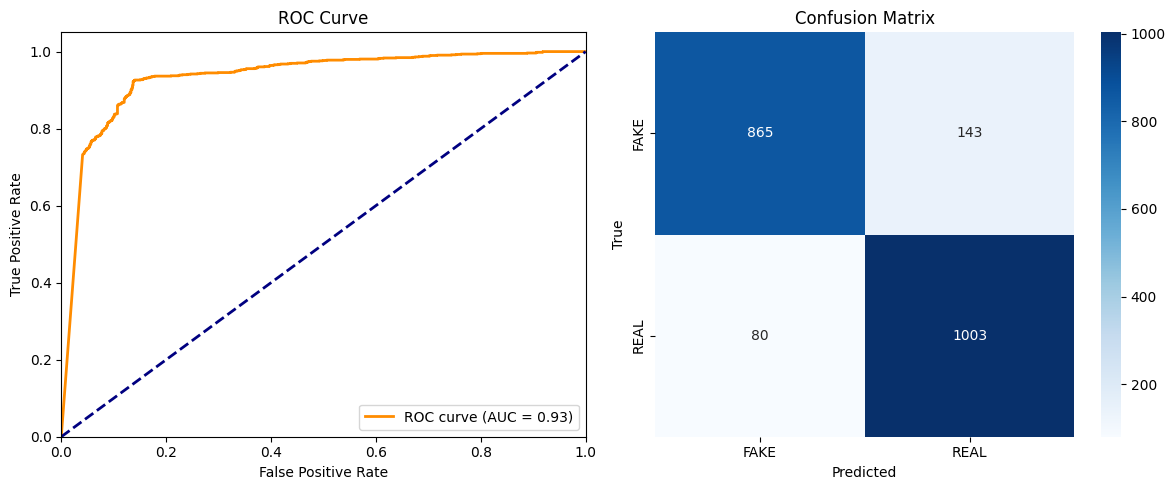

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix and ROC with CountVectorizer")

# Calculate the ROC curve
y_pred_prob = nb_classifier.predict_proba(count_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='REAL')
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve and the confusion matrix
plt.figure(figsize=(12, 5))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Plot confusion matrix as a heatmap
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

### Training and testing the "fake news" model with TfidfVectorizer
Now that you have evaluated the model using the `CountVectorizer`, you'll do the same using the `TfidfVectorizer` with a Naive Bayes model.

Accuracy: 0.86
Confusion Matrix and ROC with TfidfVectorizer


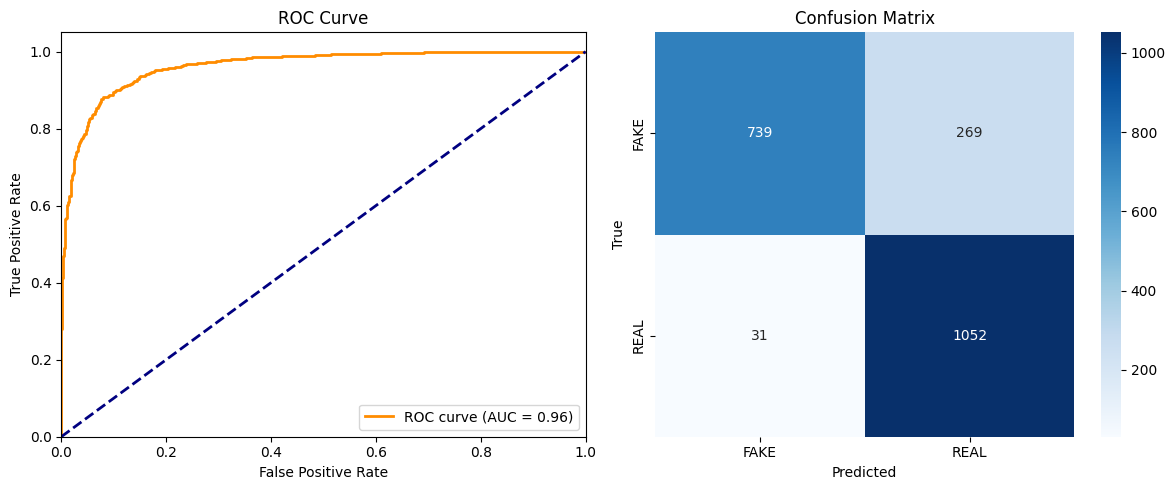

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate the confusion matrix: cm
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
print("Confusion Matrix and ROC with TfidfVectorizer")

# Calculate the ROC curve
y_pred_prob = nb_classifier.predict_proba(tfidf_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='REAL')
auc = roc_auc_score(y_test, y_pred_prob)

# Plot the ROC curve and the confusion matrix
plt.figure(figsize=(12, 5))

# Plot ROC curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Plot confusion matrix as a heatmap
plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['FAKE', 'REAL'], yticklabels=['FAKE', 'REAL'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

## **Simple NLP, complex problems**


### Improving your model


What are possible next steps you could take to improve the model?

- *Tweaking alpha levels.*
- *Trying a new classification model.*
- *Training on a larger dataset.*
- *Improving text preprocessing.*

For the larger models:

**Tweaking Alpha Levels:**

- Alpha levels control the trade-off between model-generated responses and user-provided instructions. Fine-tuning these levels can help make the model's output more aligned with the desired context or style.
- Increasing alpha makes the output more focused on the given instruction, while decreasing it makes the output more creative and free-form.
- Experimenting with different alpha values can help you strike the right balance for your specific use case.

**Trying a New Classification Model:**

- GPT-3.5 is a language model, and while it can perform some classification tasks, its primary strength lies in generating text. If your task is primarily classification-oriented, you might consider using a specialized classification model.
- Models like BERT, RoBERTa, or more recent transformer-based architectures designed for classification tasks might be more suitable depending on your specific requirements.

**Training on a Larger Dataset:**

- Training on a larger and more diverse dataset can potentially improve the model's performance, as it can learn from a broader range of language patterns and contexts.
- However, increasing the dataset size also comes with computational and infrastructure challenges, including higher costs and longer training times.

**Improving Text Preprocessing:**

- Proper text preprocessing is crucial for improving the model's understanding and performance. This can include tasks such as tokenization, text cleaning, and data augmentation.
- Fine-tuning the preprocessing steps to handle domain-specific language or text types can lead to better model performance.

**Additional Steps to Consider:**

- **Fine-Tuning:**
  - Fine-tuning the model on domain-specific or task-specific data can significantly improve its performance for specific applications.
  - It allows you to adapt the model's behavior to better suit your needs.

- **Diversity in Data:**
  - Ensuring diversity in the training data, including different languages, cultures, and perspectives, can help reduce biases and improve the model's ability to understand and generate content for a global audience.

- **Ethical and Safety Measures:**
  - Implementing ethical guidelines and safety measures to prevent the model from generating harmful or inappropriate content is essential, especially in applications where user-generated text is involved.

- **Feedback Loops:**
  - Collecting user feedback and iteratively improving the model based on real-world usage can be invaluable for refining its capabilities.

- **Research and Development:**
  - Stay updated with the latest research in the field of natural language processing and AI. Incorporate state-of-the-art techniques and insights into your model development process.

The choice of which steps to take depends on your specific objectives, available resources, and the nature of your application. Often, a combination of these approaches is necessary to achieve the best results. Regular testing, evaluation, and adaptation based on real-world usage are essential for model improvement.




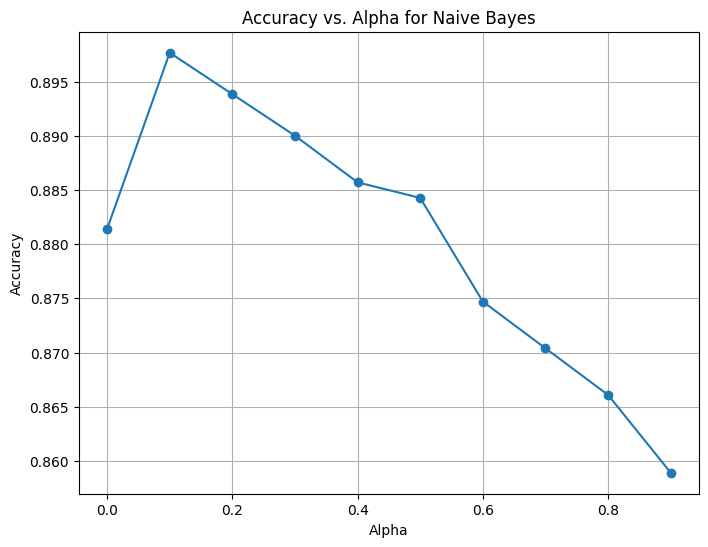

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

import warnings


# Suppress FutureWarnings and UserWarnings related to MultinomialNB
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Create the list of alphas: alphas
alphas = np.arange(0, 1, 0.1)

# Define train_and_predict()
def train_and_predict(alpha):
    # Instantiate the classifier: nb_classifier
    nb_classifier = MultinomialNB(alpha=alpha)

    # Fit to the training data
    nb_classifier.fit(tfidf_train, y_train)

    # Predict the labels: pred
    pred = nb_classifier.predict(tfidf_test)

    # Compute accuracy: score
    score = accuracy_score(y_test, pred)
    return score

# Initialize an empty list to store the accuracy scores
scores = []

# Iterate over the alphas and compute the corresponding scores
for alpha in alphas:
    score = train_and_predict(alpha)
    scores.append(score)

# Plot the accuracy scores against the alpha values
plt.figure(figsize=(8, 6))
plt.plot(alphas, scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Alpha for Naive Bayes')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

### **Inspecting Model**

Now that we have built a "fake news" classifier, we will investigate what it has learned. we can map the important vector weights back to actual words using some simple inspection techniques.

In [15]:
# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Zip the feature names together with the coefficient array
# and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[0], feature_names))

# Print the first class label and the top 20 feat_with_weights entries
print(class_labels[0], feat_with_weights[:20])

# Print the second class label and the bottom 20 feat_with_weights entries
print(class_labels[1], feat_with_weights[-20:])

FAKE [(-11.280753302177917, '00000031'), (-11.280753302177917, '00006'), (-11.280753302177917, '000ft'), (-11.280753302177917, '001'), (-11.280753302177917, '002'), (-11.280753302177917, '003'), (-11.280753302177917, '006'), (-11.280753302177917, '008'), (-11.280753302177917, '010'), (-11.280753302177917, '013'), (-11.280753302177917, '025'), (-11.280753302177917, '027'), (-11.280753302177917, '035'), (-11.280753302177917, '037'), (-11.280753302177917, '040'), (-11.280753302177917, '044'), (-11.280753302177917, '048'), (-11.280753302177917, '066'), (-11.280753302177917, '068'), (-11.280753302177917, '075')]
REAL [(-8.036772745824807, 'president'), (-8.022187159522364, 'american'), (-8.013319806154513, 'media'), (-8.007761560290644, 'donald'), (-8.006632122322646, 'october'), (-7.989623223030759, 'government'), (-7.929695447721539, 'like'), (-7.922750601304927, 'war'), (-7.915731838943572, 'new'), (-7.908889774759155, 'world'), (-7.885018054191407, 'just'), (-7.758145325115569, 'said'),

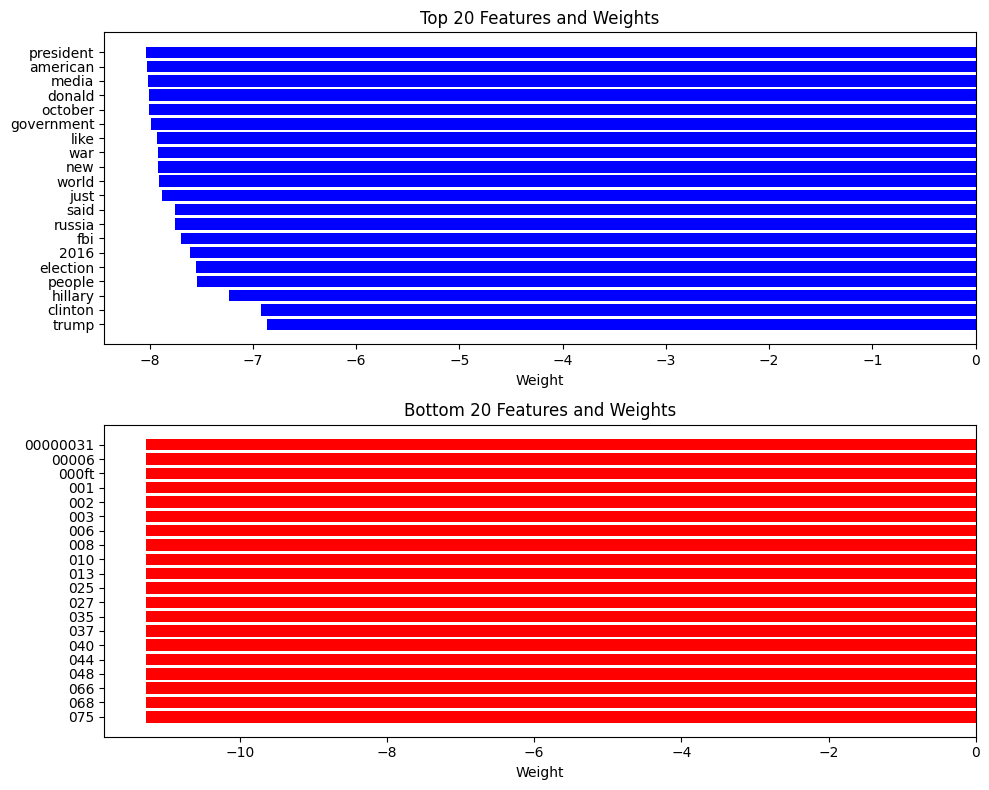

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Get the class labels: class_labels
class_labels = nb_classifier.classes_

# Extract the features: feature_names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Zip the feature names together with the coefficient array
# and sort by weights: feat_with_weights
feat_with_weights = sorted(zip(nb_classifier.feature_log_prob_[0], feature_names))

# Extract the top and bottom 20 features with their weights
top_features = feat_with_weights[-20:]
bottom_features = feat_with_weights[:20]

# Unzip the features and weights
top_weights, top_feature_names = zip(*top_features)
bottom_weights, bottom_feature_names = zip(*bottom_features)

# Create a figure with two subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the top 20 features and their weights
axes[0].barh(top_feature_names, top_weights, color='blue')
axes[0].set_xlabel('Weight')
axes[0].set_title('Top 20 Features and Weights')
axes[0].invert_yaxis()
axes[0].tick_params(axis='y', rotation=0)  # Rotate labels

# Plot the bottom 20 features and their weights
axes[1].barh(bottom_feature_names, bottom_weights, color='red')
axes[1].set_xlabel('Weight')
axes[1].set_title('Bottom 20 Features and Weights')
axes[1].invert_yaxis()
axes[1].tick_params(axis='y', rotation=0)  # Rotate labels

plt.tight_layout()
plt.show()


#### $\color{skyblue}{\textbf{Connect with me:}}$


[<img align="left" src="https://cdn4.iconfinder.com/data/icons/social-media-icons-the-circle-set/48/twitter_circle-512.png" width="32px"/>][twitter]
[<img align="left" src="https://cdn-icons-png.flaticon.com/512/145/145807.png" width="32px"/>][linkedin]
[<img align="left" src="https://cdn2.iconfinder.com/data/icons/whcompare-blue-green-web-hosting-1/425/cdn-512.png" width="32px"/>][Portfolio]

[twitter]: https://twitter.com/F4izy
[linkedin]: https://www.linkedin.com/in/mohd-faizy/
[Portfolio]: https://github.com/mohd-faizy

### **Oth.**

**ROC-AUC**

In [24]:
import sklearn.datasets
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import plotly.express as px
import pandas as pd

# Random Classification dataset
X, y = make_classification(n_samples=800, n_classes=2, random_state=1)
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities
preds = model.predict_proba(X)[:, 1]

fpr, tpr, thresh = roc_curve(y, preds)

# Create a DataFrame
roc_df = pd.DataFrame(zip(fpr, tpr, thresh), columns=["FPR", "TPR", "Thres_V"])

print(roc_df)

fig = px.area(roc_df, x="FPR", y="TPR", hover_data=["Thres_V"])

for i in range(len(roc_df)):
    if i % 20 == 0:
        fig.add_annotation(x=roc_df.iloc[i][0],
                           y=roc_df.iloc[i][1],
                           text=f"Thres_V: {roc_df.iloc[i][2]:.2f}",
                           showarrow=True,
                           arrowhead=1)

fig.add_annotation(x=0.5, y=0.5, text=f"AUC={roc_auc_score(y, preds):.2f}",showarrow=True)

fig.show()

          FPR       TPR   Thres_V
0    0.000000  0.000000  1.999992
1    0.000000  0.002481  0.999992
2    0.000000  0.243176  0.988012
3    0.002519  0.243176  0.987978
4    0.002519  0.560794  0.896033
..        ...       ...       ...
139  0.929471  0.995037  0.012190
140  0.929471  0.997519  0.011615
141  0.944584  0.997519  0.009709
142  0.944584  1.000000  0.009671
143  1.000000  1.000000  0.000476

[144 rows x 3 columns]
